In [1]:
import sys
import time
import numpy as np
import numba as nb
from matplotlib import rc
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

In [2]:
PathWindows = r"D:\Учеба\Практика\Диплом\gamma"
LibraryPathWindows = r"D:\Учеба\Практика\Диплом\gamma\SpectrumsMeasurementsLibrary"
LibraryPathLinux = r"/home/danis/work/python_works/gamma"
sys.path.insert(0, LibraryPathWindows)
sys.path.insert(0, PathWindows)
sys.path.insert(0, LibraryPathLinux)

In [3]:
from GammaRayInteractions.Materials import Material, R
from CrossSectionsLibrary.cross_sections_data import ENERGY_MESH
from MeasurementInstrumentation.measurement_techniques import ideal_transmission_function, \
k_edge_method_transmission_function, ross_method_transmission_function, edges_indices, open_detector
from NumericalMethods.simpson_rule import simpson_rule
from NumericalMethods.unfolding_technique import Gold

import matplotlib.ticker as mticker
from local_scripts import initialization_brem, generate_empty_matrix, complete_empty_matrix, integrate_the_row, get_integral_signals, apply_function_to_matrix

In [4]:
font_properties = {'family' : 'Arial', 'weight' : 'regular', 'size' : 14}
rc('font', **font_properties)

Инициализация спектра

In [5]:
z = 50
beam_energy = 0.075
brem = initialization_brem(z, beam_energy)

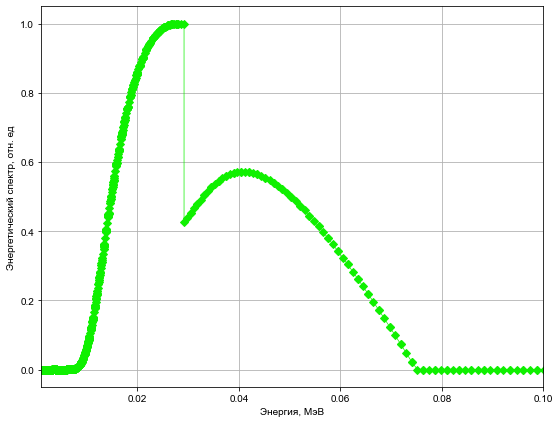

In [6]:
fig, ax = plt.subplots(figsize=(9, 7))

ax.plot(ENERGY_MESH, brem, ls='-', marker='D', lw='0.7', ms=5, color='#0FF000')

# настройки графика
ax.set_xlabel('Энергия, МэВ')
ax.set_ylabel('Энергетический спектр, отн. ед')
ax.tick_params(axis='both')

# ax.set_xscale('log')
# ax.set_yscale('log')
ax.set_xlim(1e-3, 0.10e0)
# ax.set_ylim(1e-7, 1.2)

ax.grid(True)

# fig.savefig('Тормозной спектр.jpg', bbox_inches='tight')

Уровни пропускания системы

In [23]:
levels = np.linspace(0.001, 0.9, 51)

Инициализация измерительных каналов

In [25]:
first_channel = 11
last_channel = 100 
number_of_channels = last_channel - first_channel + 1

In [29]:
# создание измерительных систем с различными уровнями пропускания
MEASURING_SYSTEMS = []
channel_with_open_detector = open_detector() # канал с открытым детектором

st = time.time() # начальное время
for ind, level in enumerate(levels):
    EDGE_METHOD_channels = [k_edge_method_transmission_function(num, level) for num in range(first_channel, last_channel+1)]
    EDGE_METHOD_channels.insert(0, channel_with_open_detector) # добавление канала с открытым детектором
    MEASURING_SYSTEMS.append(EDGE_METHOD_channels)
    print(f'Выполнено: {ind+1} из {len(levels)}. Текущее время выполнения: {round(time.time()-st, 3)} секунд')

Выполнено: 1 из 51. Текущее время выполнения: 1.464 секунд
Выполнено: 2 из 51. Текущее время выполнения: 3.1 секунд
Выполнено: 3 из 51. Текущее время выполнения: 4.61 секунд
Выполнено: 4 из 51. Текущее время выполнения: 6.09 секунд
Выполнено: 5 из 51. Текущее время выполнения: 7.559 секунд
Выполнено: 6 из 51. Текущее время выполнения: 9.051 секунд
Выполнено: 7 из 51. Текущее время выполнения: 10.516 секунд
Выполнено: 8 из 51. Текущее время выполнения: 11.979 секунд
Выполнено: 9 из 51. Текущее время выполнения: 13.364 секунд
Выполнено: 10 из 51. Текущее время выполнения: 14.854 секунд
Выполнено: 11 из 51. Текущее время выполнения: 16.36 секунд
Выполнено: 12 из 51. Текущее время выполнения: 17.886 секунд
Выполнено: 13 из 51. Текущее время выполнения: 19.33 секунд
Выполнено: 14 из 51. Текущее время выполнения: 20.779 секунд
Выполнено: 15 из 51. Текущее время выполнения: 22.264 секунд
Выполнено: 16 из 51. Текущее время выполнения: 23.603 секунд
Выполнено: 17 из 51. Текущее время выполнения

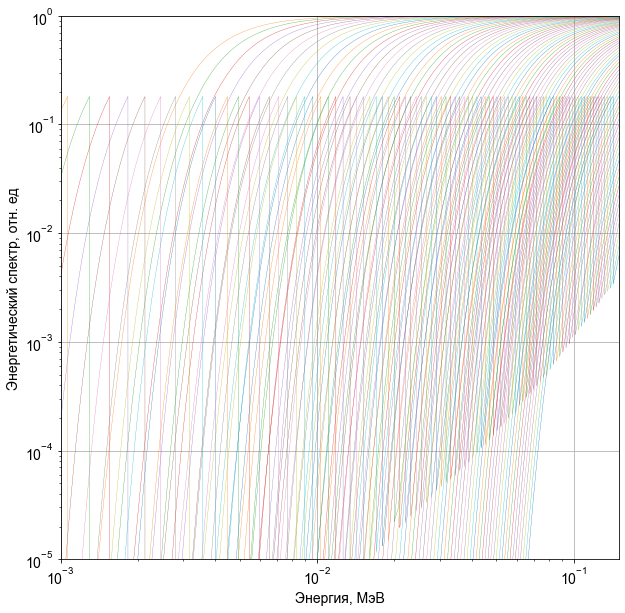

In [44]:
fig, ax = plt.subplots(figsize=(10, 10))

system_num = 10
system = MEASURING_SYSTEMS[system_num]

for r in system:
    ax.plot(ENERGY_MESH, r, ls='-', lw='0.3', ms=5)

# настройки графика
ax.set_xlabel('Энергия, МэВ')
ax.set_ylabel('Энергетический спектр, отн. ед')
ax.tick_params(axis='both')
ax.set_xscale('log')
ax.set_yscale('log')

ax.set_xlim(1e-3, 0.15)
ax.set_ylim(1e-5, 1e0)
ax.grid(True)

Создание матриц измерительных систем

In [45]:
# создание матриц измерительных систем с различными уровнями пропускания
MEASURING_SYSTEMS_MATRIX = []

st = time.time() # начальное время
for ind, system in enumerate(MEASURING_SYSTEMS):
    matrix = [simpson_rule(r, regime='c', function_jumps=[]) for r in system] # создание матрицы одной системы
#     matrix = np.array([simpson_rule(r, regime='c', function_jumps=[]) for r in system]) # нужно так
    MEASURING_SYSTEMS_MATRIX.append(matrix)
    print(f'Выполнено: {ind+1} из {len(levels)}. Текущее время выполнения: {round(time.time()-st, 3)} секунд')

Выполнено: 1 из 51. Текущее время выполнения: 8.858 секунд
Выполнено: 2 из 51. Текущее время выполнения: 17.401 секунд
Выполнено: 3 из 51. Текущее время выполнения: 26.108 секунд
Выполнено: 4 из 51. Текущее время выполнения: 35.339 секунд
Выполнено: 5 из 51. Текущее время выполнения: 44.133 секунд
Выполнено: 6 из 51. Текущее время выполнения: 52.773 секунд
Выполнено: 7 из 51. Текущее время выполнения: 61.487 секунд
Выполнено: 8 из 51. Текущее время выполнения: 70.143 секунд
Выполнено: 9 из 51. Текущее время выполнения: 78.923 секунд
Выполнено: 10 из 51. Текущее время выполнения: 87.639 секунд
Выполнено: 11 из 51. Текущее время выполнения: 96.338 секунд
Выполнено: 12 из 51. Текущее время выполнения: 105.431 секунд
Выполнено: 13 из 51. Текущее время выполнения: 114.054 секунд
Выполнено: 14 из 51. Текущее время выполнения: 122.948 секунд
Выполнено: 15 из 51. Текущее время выполнения: 131.609 секунд
Выполнено: 16 из 51. Текущее время выполнения: 140.434 секунд
Выполнено: 17 из 51. Текущее 

Измерение спектра

In [153]:
new_mesh = np.array(simpson_rule(MEASURING_SYSTEMS[0][0], regime='m', function_jumps=[]))
new_brem = np.interp(new_mesh, ENERGY_MESH, brem)

In [154]:
# создание матриц измерительных систем с различными уровнями пропускания
MEASURING_SYSTEMS_SIGNALS = []

st = time.time() # начальное время
for ind, matrix in enumerate(MEASURING_SYSTEMS_MATRIX):
    signals = np.array(matrix) @ new_brem # вычисление фильтрационной кривой одной системы
    MEASURING_SYSTEMS_SIGNALS.append(signals)
    print(f'Выполнено: {ind+1} из {len(levels)}. Текущее время выполнения: {round(time.time()-st, 3)} секунд')

Выполнено: 1 из 51. Текущее время выполнения: 0.001 секунд
Выполнено: 2 из 51. Текущее время выполнения: 0.002 секунд
Выполнено: 3 из 51. Текущее время выполнения: 0.004 секунд
Выполнено: 4 из 51. Текущее время выполнения: 0.005 секунд
Выполнено: 5 из 51. Текущее время выполнения: 0.005 секунд
Выполнено: 6 из 51. Текущее время выполнения: 0.006 секунд
Выполнено: 7 из 51. Текущее время выполнения: 0.007 секунд
Выполнено: 8 из 51. Текущее время выполнения: 0.007 секунд
Выполнено: 9 из 51. Текущее время выполнения: 0.008 секунд
Выполнено: 10 из 51. Текущее время выполнения: 0.009 секунд
Выполнено: 11 из 51. Текущее время выполнения: 0.009 секунд
Выполнено: 12 из 51. Текущее время выполнения: 0.01 секунд
Выполнено: 13 из 51. Текущее время выполнения: 0.01 секунд
Выполнено: 14 из 51. Текущее время выполнения: 0.011 секунд
Выполнено: 15 из 51. Текущее время выполнения: 0.012 секунд
Выполнено: 16 из 51. Текущее время выполнения: 0.013 секунд
Выполнено: 17 из 51. Текущее время выполнения: 0.01

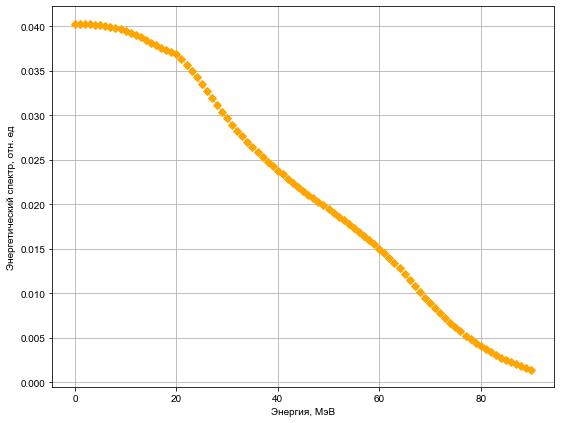

In [140]:
fig, ax = plt.subplots(figsize=(9, 7))

signals_num = 45
ax.plot(list(range(number_of_channels+1)), MEASURING_SYSTEMS_SIGNALS[signals_num], ls='-', marker='D', lw='0.7', ms=5, color='orange')

# настройки графика
ax.set_xlabel('Энергия, МэВ', fontsize=10)
ax.set_ylabel('Энергетический спектр, отн. ед', fontsize=10)
ax.tick_params(axis='both', labelsize=10)
# ax.set_xscale('log')
# ax.set_yscale('log')
# ax.set_xlim(1.e-5, 0.3e-4)
# ax.set_ylim(1e-7, 1.2)
ax.grid(True)

Восстановление спектра

In [155]:
num = 30
Matrix = np.array(MEASURING_SYSTEMS_MATRIX[num]) 
new_mesh = np.array(simpson_rule(MEASURING_SYSTEMS[num][0], regime='m', function_jumps=[]))

In [156]:
signals_simpson = MEASURING_SYSTEMS_SIGNALS[num]
bound_100_kev = Material(100).k_edge_index()

In [163]:
result = Gold(Matrix, signals_simpson, -1, ENERGY_MESH, new_mesh, brem, iteration_number=10000, bound=bound_100_kev, journal=False, weight_mode='value')

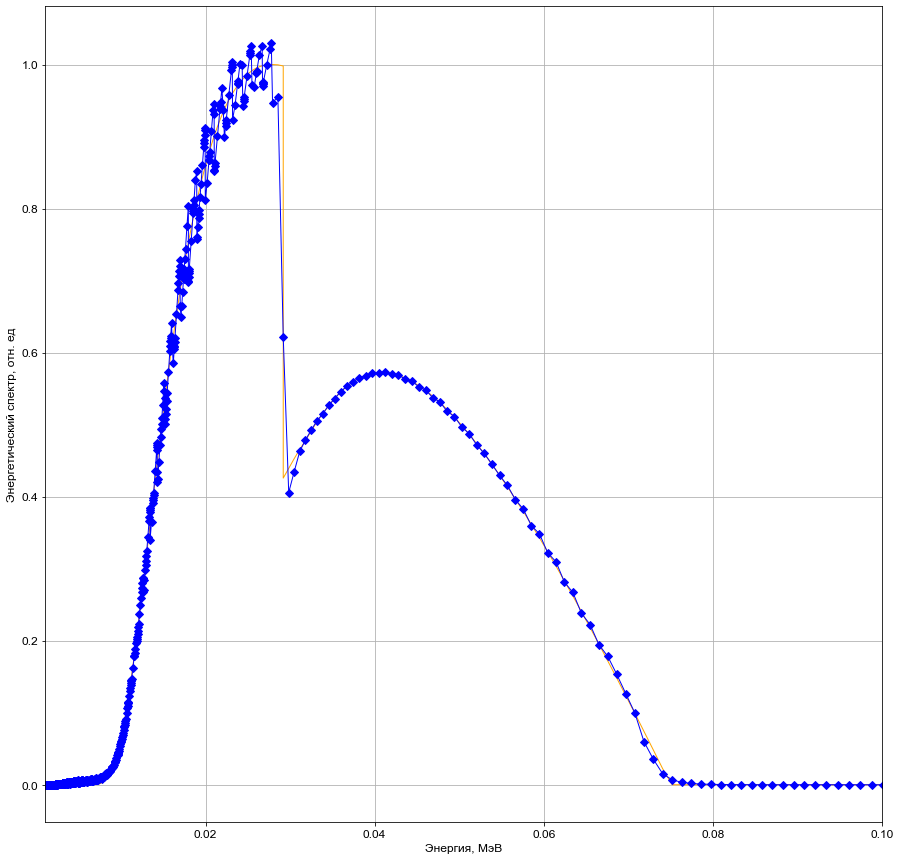

In [164]:
fig, ax = plt.subplots(figsize=(15, 15))

ax.plot(ENERGY_MESH, brem, ls='-', lw='1', ms=5, color='orange')
ax.plot(new_mesh, result[0], ls='-', lw='1', marker='D', ms=5, color='blue')


# настройки графика
ax.set_xlabel('Энергия, МэВ', fontsize=12)
ax.set_ylabel('Энергетический спектр, отн. ед', fontsize=12)
ax.tick_params(axis='both', labelsize=12)
# ax.set_xscale('log')
# ax.set_yscale('log')
ax.set_xlim(1e-3, 0.1e0)
# ax.set_ylim(1e-7, 1.2)
ax.grid(True)

In [128]:
# создание матриц измерительных систем с различными уровнями пропускания
RESULTS = []

st = time.time() # начальное время
for ind, matrix in enumerate(MEASURING_SYSTEMS_MATRIX):
    result = Gold(np.array(matrix), MEASURING_SYSTEMS_SIGNALS[ind], -1, ENERGY_MESH, new_mesh, brem, iteration_number=10000, bound=bound_100_kev, journal=False, weight_mode='value')
    RESULTS.append(result)
    print(f'Выполнено: {ind+1} из {len(levels)}. Текущее время выполнения: {round(time.time()-st, 3)} секунд')

Выполнено: 1 из 51. Текущее время выполнения: 3.085 секунд
Выполнено: 2 из 51. Текущее время выполнения: 6.127 секунд
Выполнено: 3 из 51. Текущее время выполнения: 9.128 секунд
Выполнено: 4 из 51. Текущее время выполнения: 12.148 секунд
Выполнено: 5 из 51. Текущее время выполнения: 15.163 секунд
Выполнено: 6 из 51. Текущее время выполнения: 18.172 секунд
Выполнено: 7 из 51. Текущее время выполнения: 21.178 секунд
Выполнено: 8 из 51. Текущее время выполнения: 24.201 секунд
Выполнено: 9 из 51. Текущее время выполнения: 27.213 секунд
Выполнено: 10 из 51. Текущее время выполнения: 30.232 секунд
Выполнено: 11 из 51. Текущее время выполнения: 33.223 секунд
Выполнено: 12 из 51. Текущее время выполнения: 36.232 секунд
Выполнено: 13 из 51. Текущее время выполнения: 39.239 секунд
Выполнено: 14 из 51. Текущее время выполнения: 42.283 секунд
Выполнено: 15 из 51. Текущее время выполнения: 45.334 секунд
Выполнено: 16 из 51. Текущее время выполнения: 48.764 секунд
Выполнено: 17 из 51. Текущее время в

Зависимость ошибки восстановления от уровня пропускания

In [130]:
DEVIATIONS = [results[1] for results in RESULTS]

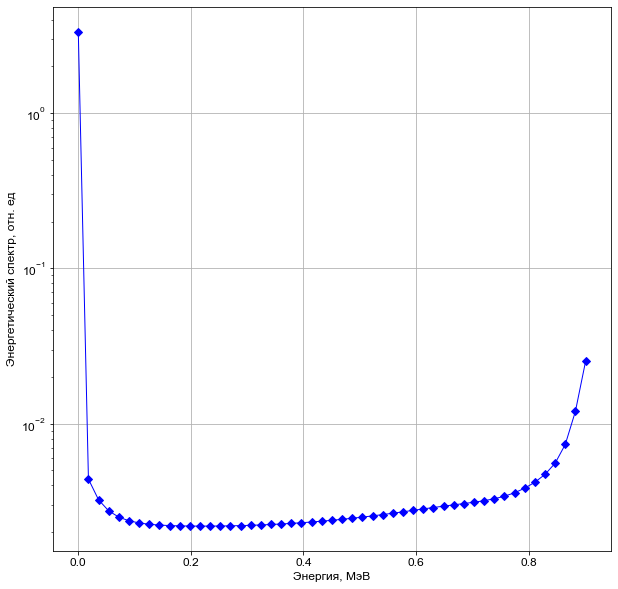

In [135]:
fig, ax = plt.subplots(figsize=(10, 10))

ax.plot(levels, DEVIATIONS, ls='-', lw='1', marker='D', ms=5, color='blue')

# настройки графика
ax.set_xlabel('Энергия, МэВ', fontsize=12)
ax.set_ylabel('Энергетический спектр, отн. ед', fontsize=12)
ax.tick_params(axis='both', labelsize=12)
# ax.set_xscale('log')
ax.set_yscale('log')
ax.grid(True)

Сохранение результатов

In [124]:
np.save('ИЗМЕРИТЕЛЬНЫЕ_СИСТЕМЫ_С_РАЗНЫМИ_ПРОПУСКАНИЯМИ_К.npy', MEASURING_SYSTEMS)

In [125]:
np.save('МАТРИЦЫ_ИЗМЕРИТЕЛЬНЫХ_СИСТЕМ_С_РАЗНЫМИ_ПРОПУСКАНИЯМИ_К.npy', MEASURING_SYSTEMS_MATRIX)

In [126]:
np.save('УРОВНИ_ПРОПУСКАНИЯ.npy', levels)